**TRUCK** **PROBLEM**

In [30]:
!pip install matplotlib deap

In [31]:
import matplotlib.pyplot as plt
import random
import numpy as np
from deap import base, creator, tools, algorithms

In [32]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10 # Define the number of locations (eg 10)

 # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100
locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(num_locations)]

depot = (50,50)
 # Define the coordinates for the depot

num_vehicles = 3
# Define the number of vehicles - (eg 3)

#print(locations)

In [33]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness,weights=(-1.0,-1.0) )
creator.create("Individual",list,fitness=creator.FitnessMin )

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [34]:

 # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [54]:
# either way of doing the above task

def evalVRP(individual):
  total_distance = 0
  distances = []
  for i in range(num_vehicles):
    vehicle_route  = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)]+[depot]

    vehicle_distance = 0
    for k in range(len(vehicle_route) -1 ):
      distance = np.sqrt((vehicle_route[k+1][0] - vehicle_route[k][0]) **2 + (vehicle_route[k+1][1] - vehicle_route[k][1]**2))
      vehicle_distance += distance

    total_distance += vehicle_distance
    distances.append(vehicle_distance)

  balance_penalty = np.std(distance)
  return total_distance, balance_penalty

In [56]:
#6 Register the evaluate function in the toolbox
toolbox.register("evaluate", evalVRP)

In [60]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxPartialyMatched)# Choose and configure a crossover method)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb = 0.2)# Choose and configure a mutation method)
toolbox.register("select", tools.selTournament, tournsize=3)# Choose and configure a selection method)

In [61]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    #TODO: Task 5 - Write a function to visualize the routes - just plot the points and lines for each vehicle
     """Visualizes the routes of vehicles based on the individual's solution.

    Args:
        individual: A list representing the order of locations visited.
        title: The title of the plot.
    """

    # Create a new figure and axes
     fig, ax = plt.subplots()

    # Plot the depot
     ax.scatter(depot[0], depot[1], marker='s', color='black', label='Depot')

    # Plot the locations
     for i, location in enumerate(locations):
        ax.scatter(location[0], location[1], marker='o', color='blue', label=f'Location {i + 1}')

    # Plot the routes for each vehicle with different colors
     colors = ['red', 'green', 'purple', 'orange', 'cyan']  # Add more colors if needed
     for i in range(num_vehicles):
        # Extract the route for the current vehicle
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Plot the route as a line
        route_x = [loc[0] for loc in vehicle_route]
        route_y = [loc[1] for loc in vehicle_route]
        ax.plot(route_x, route_y, color=colors[i % len(colors)], label=f'Vehicle {i + 1}')

    # Set plot title and labels
     ax.set_title(title)
     ax.set_xlabel("X Coordinate")
     ax.set_ylabel("Y Coordinate")

    # Add legend


    # Show the plot
     plt.show()

<ipython-input-54-63ba474d7899>:11: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((vehicle_route[k+1][0] - vehicle_route[k][0]) **2 + (vehicle_route[k+1][1] - vehicle_route[k][1]**2))


gen	nevals	avg	min
0  	300   	nan	nan
1  	226   	nan	nan
2  	240   	nan	nan
3  	226   	nan	nan
4  	239   	nan	nan
5  	226   	nan	nan
6  	240   	nan	nan
7  	247   	nan	nan
8  	236   	nan	nan
9  	243   	nan	nan
10 	239   	nan	nan
11 	230   	nan	nan
12 	248   	nan	nan
13 	222   	nan	nan
14 	243   	nan	nan
15 	243   	nan	nan
16 	239   	nan	nan
17 	219   	nan	nan
18 	219   	nan	nan
19 	225   	nan	nan
20 	256   	nan	nan
21 	232   	nan	nan
22 	214   	nan	nan
23 	237   	nan	nan
24 	233   	nan	nan
25 	236   	nan	nan
26 	221   	nan	nan
27 	239   	nan	nan
28 	222   	nan	nan
29 	244   	nan	nan
30 	242   	nan	nan


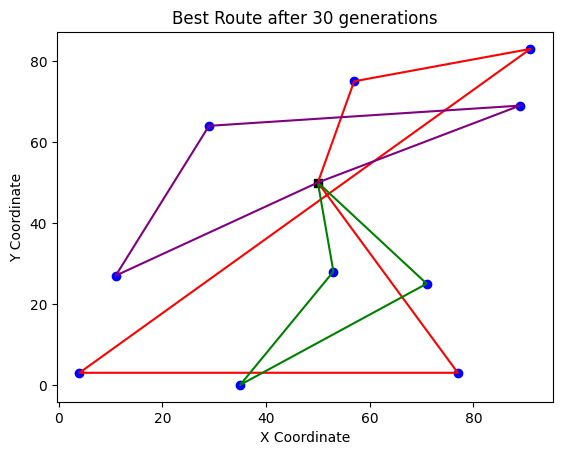

In [62]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html
    plot_routes(hof[0], title="Best Route after {} generations".format(30))

    return pop, stats, hof

if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results
    main()